In [1]:
import os
import json


In [2]:
data_list = []
for file in os.listdir("raw_data"):
    with open(os.path.join("raw_data", file), "r", encoding="utf-8") as f:
        data_list.extend(f.read().split("\n"))
data_list = [x.strip() for x in data_list if x.strip()]
print(len(data_list))

data_list = [{"label": k, "sentence1": v} for k, v in map(lambda x:x.split("\t"), data_list)]
print(data_list[0])

4900
{'label': '体育_CBA', 'sentence1': '轰16+12+3帽！周琦打出复出后代表作，制霸篮下，末节崩盘被逆转'}


In [3]:
import pandas as pd
from datasets import Dataset

In [4]:
df = pd.DataFrame(data_list)
df

,label,sentence1
0,体育_CBA,轰16+12+3帽！周琦打出复出后代表作，制霸篮下，末节崩盘被逆转
1,体育_CBA,新疆队绝杀之后的一幕
2,体育_CBA,CBA奇景！外援轰62分创赛季新高 球队却狂输29分
3,体育_CBA,中国篮球人才库引发争议？队员太老不要紧 打通校园是关键
4,体育_CBA,CBA季后赛争夺白热化！4队抢2个名额 天津3连胜搅局
...,...,...
4895,科技_车科技,蔚小理 自动驾驶谁第一？
4896,科技_车科技,集度汽车量产车型将于11月广州车展亮相 2023年上市
4897,科技_车科技,松下将于2024财年开始为特斯拉量产4680型电池
4898,科技_车科技,电动汽车有望每周只需充电一次？锂硫电池关键障碍被突破


In [5]:
df["label"].value_counts()

科技_数码      299
科技_手机      296
汽车_试驾      200
汽车_新车      200
体育_CBA     199
政务_政策      199
科技_区块链     199
汽车_行业      199
时尚_美容      199
体育_NBA     199
科技_车科技     199
政务_地方      199
政务_发展治理    199
政务_反腐      199
娱乐_音乐      199
娱乐_电视      199
娱乐_电影      199
体育_国际足球    199
体育_中国足球    199
时尚_情感      198
时尚_时装      198
娱乐_明星      197
政务_文旅      127
汽车_导购      100
科技_5G      100
Name: label, dtype: int64

count    4900.000000
mean       24.592857
std         6.170020
min         6.000000
25%        21.000000
50%        25.000000
75%        29.000000
max        70.000000
Name: sentence1, dtype: float64


<AxesSubplot:ylabel='Frequency'>

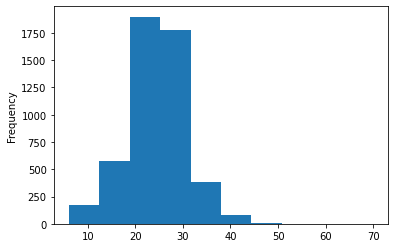

In [6]:
line_df = df["sentence1"].str.len()
print(line_df.describe())
line_df.plot(kind="hist")

In [7]:
ds = Dataset.from_pandas(df)
ds = ds.train_test_split(test_size=0.2)
ds["train"].to_csv("train.csv", index=False, sep="\t")
ds["test"].to_csv("test.csv", index=False, sep="\t")

Creating CSV from Arrow format: 100%|██████████| 1/1 [00:00<00:00, 249.41ba/s]


81769

In [8]:
print(len(pd.DataFrame(iter(ds["train"]))["label"].value_counts()))
print(len(pd.DataFrame(iter(ds["test"]))["label"].value_counts()))

25
25
